In [53]:
import pandas as pd
import numpy as np
import pymysql
import getpass
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
conn = pymysql.connect(host="localhost",
                       port=3306,
                       user="ironhack",
                       passwd=getpass.getpass(),
                       db="olist")

········


# 1. How many sellers do we have?

In [4]:
sellers_query = """
SELECT
    DISTINCT seller_id
FROM olist.order_items;
"""

sellers = pd.read_sql(sellers_query, conn)

In [6]:
sellers.shape

(3095, 1)

=> We have 3095 unique sellers!

But how many in the different years?

In [7]:
sellers_year_query = """
SELECT
    DATE_FORMAT(o.order_purchase_timestamp, '%Y-01-01') AS year_id,
    COUNT(DISTINCT seller_id) AS no_of_sellers
FROM olist.order_items oi
    JOIN olist.orders o
    ON oi.order_id = o.order_id
GROUP BY 1;
"""

sellers_year = pd.read_sql(sellers_year_query, conn)

In [8]:
sellers_year

,year_id,no_of_sellers
0,2016-01-01,145
1,2017-01-01,1784
2,2018-01-01,2383


In 2018, we've had 2383. That's more than in 2017 and in 2016! \o/

# 2. How much do the sellers sell?

In [9]:
seller_items_sold_query = """
SELECT
    seller_id,
    COUNT(1)    AS items_sold
FROM olist.order_items
GROUP BY 1;
"""

seller_items_sold = pd.read_sql(seller_items_sold_query, conn)

In [10]:
seller_items_sold.describe()

,items_sold
count,3095.000000
mean,36.397415
std,119.193461
min,1.000000
25%,2.000000
50%,8.000000
75%,24.000000
max,2033.000000


- A quarter of the sellers, sold 1 or 2 items
- Half of the sellers, sold up to 8 items
- The top 25% of the sellers, sold at least 24 items
- The top seller has sold 2033 item
- On average, sellers sell 36 items

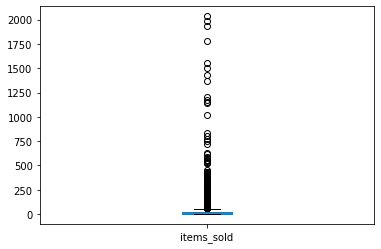

In [15]:
# show boxplot
seller_items_sold.plot(kind="box");

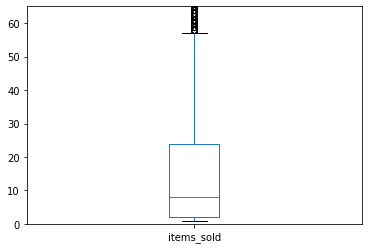

In [17]:
# zooming in
seller_items_sold.plot(kind="box",
                       ylim=(0,65));

Not so useful, let's look at a histrogram

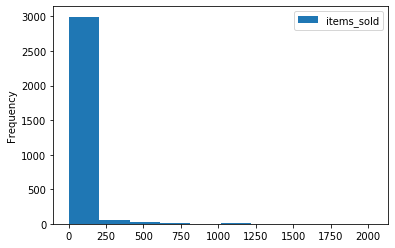

In [18]:
seller_items_sold.plot(kind="hist");

Pretty skewed. Increase number of bins and zoom into smaller range

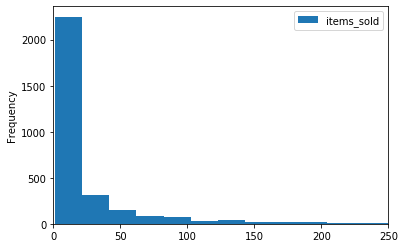

In [22]:
seller_items_sold.plot(bins=100, 
                       kind="hist",
                       xlim=(0,250));

Plot the percentiles. Because, why not?

In [23]:
np.quantile(seller_items_sold["items_sold"], .5)

8.0

In [24]:
np.quantile(seller_items_sold["items_sold"], [.25, .5, .75])

array([ 2.,  8., 24.])

In [29]:
np.quantile(seller_items_sold["items_sold"], range(1,100))

ValueError: Quantiles must be in the range [0, 1]

In [37]:
[i/100 for i in range(1,100)]

[0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.4,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99]

In [38]:
np.arange(0,1,.01)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [43]:
percentiles = pd.DataFrame(np.quantile(seller_items_sold["items_sold"], np.arange(0,1,.01)),
                           columns=["percentile"])

In [47]:
percentiles["percentile"][50]

8.0

In [48]:
percentiles["percentile"][25]

2.0

In [49]:
percentiles["percentile"][75]

24.0

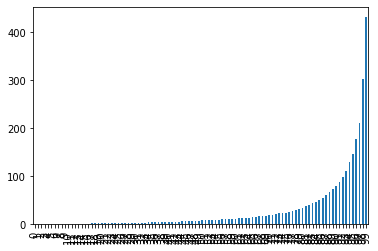

In [52]:
percentiles["percentile"].plot(kind="bar");

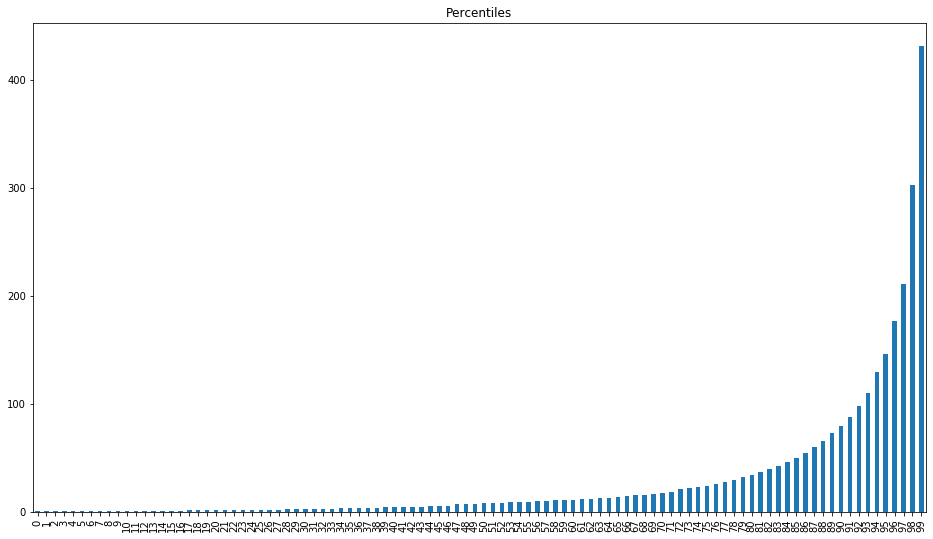

In [55]:
fig = plt.figure(figsize=(16,9))
percentiles["percentile"].plot(kind="bar");
plt.title("Percentiles");

In [56]:
# alternatively, you can call the quantile method on a dataframe
# get deciles:
seller_items_sold.quantile(np.arange(0,1,.1))

,items_sold
0.0,1.0
0.1,1.0
0.2,2.0
0.3,3.0
0.4,5.0
0.5,8.0
0.6,11.0
0.7,18.0
0.8,34.2
0.9,80.0


# 2. How much revenue are they generating in 2017?

In [58]:
sellers_rev_query = """
SELECT
    oi.seller_id,
    SUM(oi.price) AS revenue
FROM olist.order_items oi
    JOIN olist.orders o
    ON oi.order_id = o.order_id
WHERE
    o.order_delivered_customer_date >= '20170101'
    AND o.order_delivered_customer_date < '20180101' 
GROUP BY 1;
"""

sellers_rev = pd.read_sql(sellers_rev_query, conn)

In [59]:
sellers_rev

,seller_id,revenue
0,3504c0cb71d7fa48d967e0e4c94d59d9,2349.940056
1,66922902710d126a0e7d26b0e3805106,5381.800003
2,8581055ce74af1daba164fdbd55a40de,43685.870234
3,16090f2ca825584b5a147ab24aa30c86,10302.789995
4,63b9ae557efed31d1f7687917d248a8d,129.499998
...,...,...
1656,aadfe0417e61315688b6bd7043361e25,289.899994
1657,72c73be2b085b9d57650dd53eb2004c9,29.400000
1658,9ef932e837d8b7f392c0bfee9d359dc2,59.900002
1659,2d8cfba3fcd3170555941605edaa196a,45.000000


In [60]:
sellers_rev.describe()

,revenue
count,1661.000000
mean,3379.179922
std,9962.487296
min,6.500000
25%,204.100000
50%,764.320004
75%,2618.950020
max,166980.609665


In [61]:
sellers_rev.mean()

revenue    3379.179922
dtype: float64

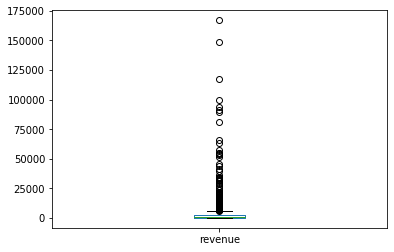

In [62]:
sellers_rev.plot(kind="box");

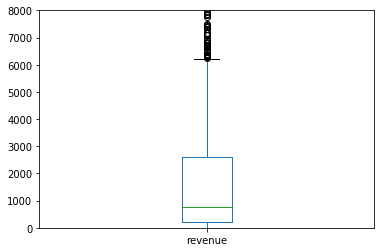

In [66]:
sellers_rev.plot(kind="box",
                 ylim=(0,8000));

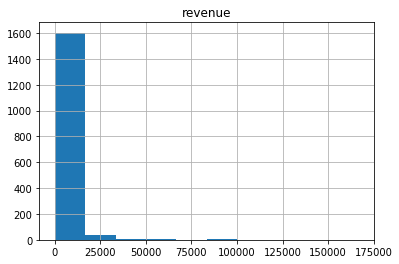

In [68]:
sellers_rev.hist();

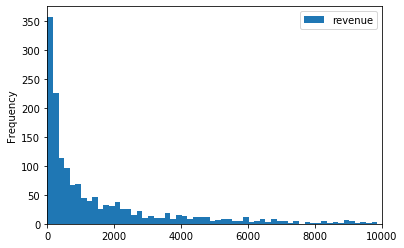

In [72]:
sellers_rev.plot(kind="hist",
                 bins=1000,
                 xlim=(0,10000));

## How much do we depend on the top sellers?

In [73]:
sellers_rev

,seller_id,revenue
0,3504c0cb71d7fa48d967e0e4c94d59d9,2349.940056
1,66922902710d126a0e7d26b0e3805106,5381.800003
2,8581055ce74af1daba164fdbd55a40de,43685.870234
3,16090f2ca825584b5a147ab24aa30c86,10302.789995
4,63b9ae557efed31d1f7687917d248a8d,129.499998
...,...,...
1656,aadfe0417e61315688b6bd7043361e25,289.899994
1657,72c73be2b085b9d57650dd53eb2004c9,29.400000
1658,9ef932e837d8b7f392c0bfee9d359dc2,59.900002
1659,2d8cfba3fcd3170555941605edaa196a,45.000000


In [91]:
# 1. order by revenue, descending
sellers_rev_c = (sellers_rev
                 .sort_values("revenue", ascending=False)
                 .reset_index(drop=True))
sellers_rev_c

,seller_id,revenue
0,53243585a1d6dc2643021fd1853d8905,166980.609665
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336
2,4a3ca9315b744ce9f8e9374361493884,117744.740963
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058
...,...,...
1656,0f94588695d71662beec8d883ffacf09,9.000000
1657,ad14615bdd492b01b0d97922e87cb87f,8.250000
1658,94b9108d4b637ba65bb4f1e53cfcf8d8,7.700000
1659,702835e4b785b67a084280efca355756,7.600000


In [92]:
# 2. generate rank
sellers_rev_c = sellers_rev_c.assign(rank=sellers_rev_c.index + 1)
sellers_rev_c

,seller_id,revenue,rank
0,53243585a1d6dc2643021fd1853d8905,166980.609665,1
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336,2
2,4a3ca9315b744ce9f8e9374361493884,117744.740963,3
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632,4
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058,5
...,...,...,...
1656,0f94588695d71662beec8d883ffacf09,9.000000,1657
1657,ad14615bdd492b01b0d97922e87cb87f,8.250000,1658
1658,94b9108d4b637ba65bb4f1e53cfcf8d8,7.700000,1659
1659,702835e4b785b67a084280efca355756,7.600000,1660


In [93]:
sellers_rev_c.head(20)

,seller_id,revenue,rank
0,53243585a1d6dc2643021fd1853d8905,166980.609665,1
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336,2
2,4a3ca9315b744ce9f8e9374361493884,117744.740963,3
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632,4
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058,5
5,7c67e1448b00f6e969d365cea6b010ab,90890.601206,6
6,fa1c13f2614d7b5c4749cbc52fecda94,89827.689400,7
7,4869f7a5dfa277a7dca6462dcf3b52b2,80614.929192,8
8,cc419e0650a3c5ba77189a1882b7556a,65519.720114,9
9,da8622b14eb17ae2831f4ac5b9dab84a,63248.099596,10


In [94]:
# calculate the relative ranks
sellers_rev_c = sellers_rev_c.assign(top_n_perc=(sellers_rev_c["rank"]/len(sellers_rev_c))*100)
sellers_rev_c

,seller_id,revenue,rank,top_n_perc
0,53243585a1d6dc2643021fd1853d8905,166980.609665,1,0.060205
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336,2,0.120409
2,4a3ca9315b744ce9f8e9374361493884,117744.740963,3,0.180614
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632,4,0.240819
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058,5,0.301023
...,...,...,...,...
1656,0f94588695d71662beec8d883ffacf09,9.000000,1657,99.759181
1657,ad14615bdd492b01b0d97922e87cb87f,8.250000,1658,99.819386
1658,94b9108d4b637ba65bb4f1e53cfcf8d8,7.700000,1659,99.879591
1659,702835e4b785b67a084280efca355756,7.600000,1660,99.939795


In [98]:
# calculate cumulative revenue
sellers_rev_c = sellers_rev_c.assign(cumulative_revenue=sellers_rev_c["revenue"].cumsum())
sellers_rev_c

,seller_id,revenue,rank,top_n_perc,cumulative_revenue
0,53243585a1d6dc2643021fd1853d8905,166980.609665,1,0.060205,1.669806e+05
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336,2,0.120409,3.156124e+05
2,4a3ca9315b744ce9f8e9374361493884,117744.740963,3,0.180614,4.333571e+05
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632,4,0.240819,5.331144e+05
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058,5,0.301023,6.264227e+05
...,...,...,...,...,...
1656,0f94588695d71662beec8d883ffacf09,9.000000,1657,99.759181,5.612788e+06
1657,ad14615bdd492b01b0d97922e87cb87f,8.250000,1658,99.819386,5.612796e+06
1658,94b9108d4b637ba65bb4f1e53cfcf8d8,7.700000,1659,99.879591,5.612804e+06
1659,702835e4b785b67a084280efca355756,7.600000,1660,99.939795,5.612811e+06


In [112]:
# calculate cumulative revenue contribution
sellers_rev_c = sellers_rev_c.assign(cum_rev_contr=sellers_rev_c["cumulative_revenue"]*100/sellers_rev_c["revenue"].sum())
sellers_rev_c

,seller_id,revenue,rank,top_n_perc,cumulative_revenue,cum_rev_contr
0,53243585a1d6dc2643021fd1853d8905,166980.609665,1,0.060205,1.669806e+05,2.974987
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336,2,0.120409,3.156124e+05,5.623064
2,4a3ca9315b744ce9f8e9374361493884,117744.740963,3,0.180614,4.333571e+05,7.720847
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632,4,0.240819,5.331144e+05,9.498160
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058,5,0.301023,6.264227e+05,11.160574
...,...,...,...,...,...,...
1656,0f94588695d71662beec8d883ffacf09,9.000000,1657,99.759181,5.612788e+06,99.999465
1657,ad14615bdd492b01b0d97922e87cb87f,8.250000,1658,99.819386,5.612796e+06,99.999612
1658,94b9108d4b637ba65bb4f1e53cfcf8d8,7.700000,1659,99.879591,5.612804e+06,99.999749
1659,702835e4b785b67a084280efca355756,7.600000,1660,99.939795,5.612811e+06,99.999884


In [113]:
sellers_rev_c.head(20)

,seller_id,revenue,rank,top_n_perc,cumulative_revenue,cum_rev_contr
0,53243585a1d6dc2643021fd1853d8905,166980.609665,1,0.060205,1.669806e+05,2.974987
1,7e93a43ef30c4f03f38b393420bc753a,148631.749336,2,0.120409,3.156124e+05,5.623064
2,4a3ca9315b744ce9f8e9374361493884,117744.740963,3,0.180614,4.333571e+05,7.720847
3,46dc3b2cc0980fb8ec44634e21d2718e,99757.308632,4,0.240819,5.331144e+05,9.498160
4,7a67c85e85bb2ce8582c35f2203ad736,93308.301058,5,0.301023,6.264227e+05,11.160574
5,7c67e1448b00f6e969d365cea6b010ab,90890.601206,6,0.361228,7.173133e+05,12.779914
6,fa1c13f2614d7b5c4749cbc52fecda94,89827.689400,7,0.421433,8.071410e+05,14.380317
7,4869f7a5dfa277a7dca6462dcf3b52b2,80614.929192,8,0.481638,8.877559e+05,15.816582
8,cc419e0650a3c5ba77189a1882b7556a,65519.720114,9,0.541842,9.532756e+05,16.983905
9,da8622b14eb17ae2831f4ac5b9dab84a,63248.099596,10,0.602047,1.016524e+06,18.110756


The top 1%, which is represented by the 17 top sellers, account for approx. a quarter (25%) of total revenue in 2017